#General Initialization (Run)

In [ ]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sn
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# modify "customized_path_to_project", path of folder in drive, where you have stored your project
customized_path_to_project = "/content/drive/MyDrive/Deep Learning/DL Project"
sys.path.append(customized_path_to_project)

# Data Exploration (Run)

In [ ]:
TESS = os.path.join(customized_path_to_project, "Data", "TESS")
tess_directory_list = os.listdir(TESS)

labels = []
paths = []

for dir in tess_directory_list:
    directories = os.listdir(TESS +'/' +dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            labels.append('surprise')
        else:
            labels.append(part)
        paths.append(TESS+'/' + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(labels, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(paths, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df['path'] = paths
Tess_df['label'] = labels
Tess_df


,Emotions,Path,path,label
0,fear,/content/drive/MyDrive/Deep Learning/DL Projec...,/content/drive/MyDrive/Deep Learning/DL Projec...,fear
1,fear,/content/drive/MyDrive/Deep Learning/DL Projec...,/content/drive/MyDrive/Deep Learning/DL Projec...,fear
2,fear,/content/drive/MyDrive/Deep Learning/DL Projec...,/content/drive/MyDrive/Deep Learning/DL Projec...,fear
3,fear,/content/drive/MyDrive/Deep Learning/DL Projec...,/content/drive/MyDrive/Deep Learning/DL Projec...,fear
4,fear,/content/drive/MyDrive/Deep Learning/DL Projec...,/content/drive/MyDrive/Deep Learning/DL Projec...,fear
...,...,...,...,...
2795,surprise,/content/drive/MyDrive/Deep Learning/DL Projec...,/content/drive/MyDrive/Deep Learning/DL Projec...,surprise
2796,surprise,/content/drive/MyDrive/Deep Learning/DL Projec...,/content/drive/MyDrive/Deep Learning/DL Projec...,surprise
2797,surprise,/content/drive/MyDrive/Deep Learning/DL Projec...,/content/drive/MyDrive/Deep Learning/DL Projec...,surprise
2798,surprise,/content/drive/MyDrive/Deep Learning/DL Projec...,/content/drive/MyDrive/Deep Learning/DL Projec...,surprise


#Data Visualisation and Exploration


In [ ]:
Tess_df['Emotions'].value_counts()

fear        400
surprise    400
angry       400
disgust     400
happy       400
sad         400
neutral     400
Name: Emotions, dtype: int64

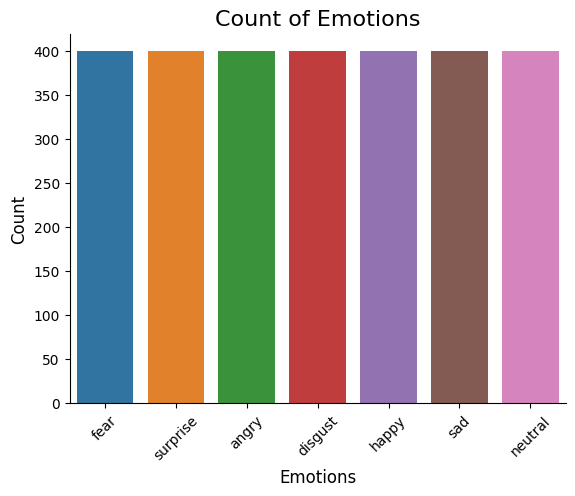

In [ ]:
emotion_counts = Tess_df['Emotions'].value_counts()
plt.title('Count of Emotions', size=16)
sn.barplot(x=emotion_counts.index, y=emotion_counts.values)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sn.despine(top=True, right=True, left=False, bottom=False)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()

##Playing audio file and plotting it to look at the output with spectograms

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

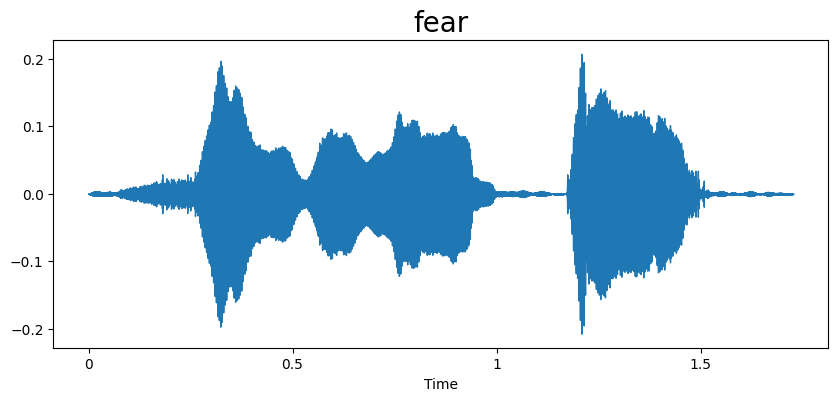

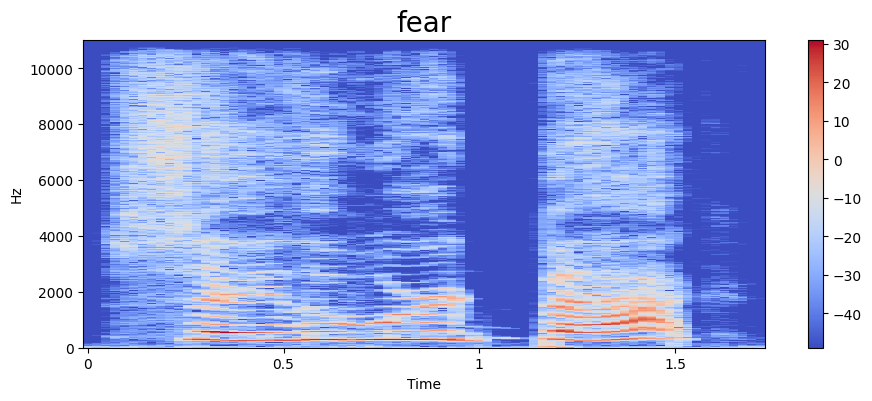

In [ ]:
# Picking a fearful track
emotion = 'fear'
path = np.array(Tess_df.Path[Tess_df.Emotions==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

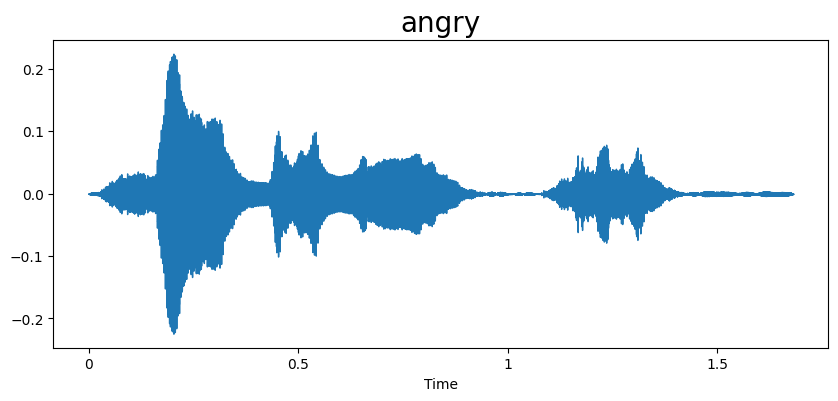

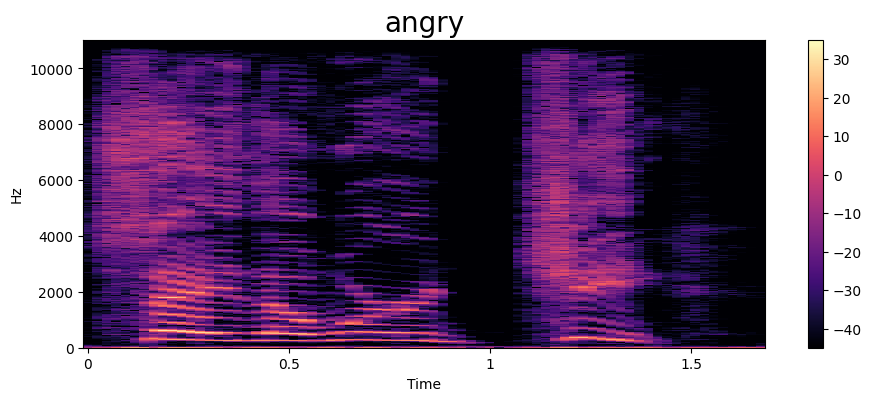

In [ ]:
# Picking a angry track
emotion = 'angry'
path = np.array(Tess_df.Path[Tess_df.Emotions==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

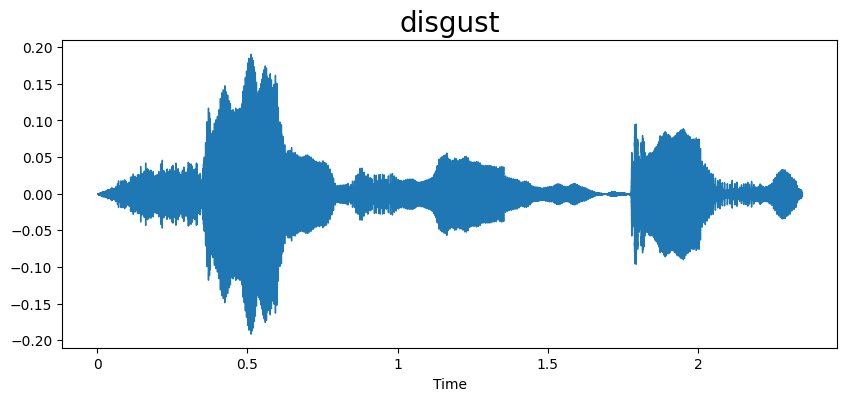

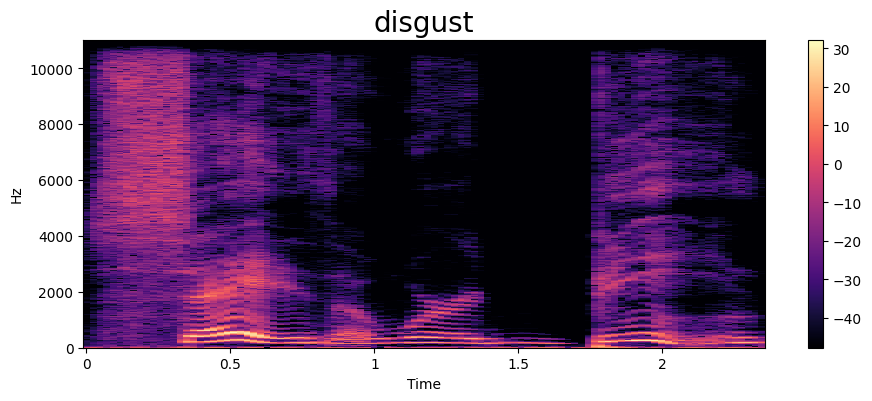

In [ ]:
emotion = 'disgust'
path = np.array(Tess_df.Path[Tess_df.Emotions==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

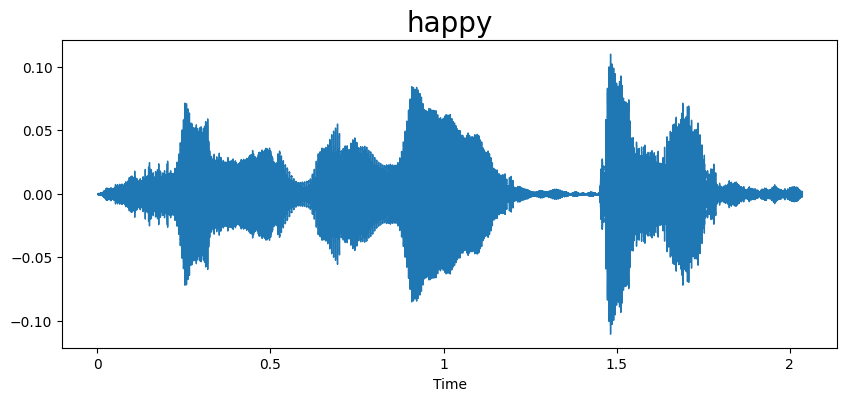

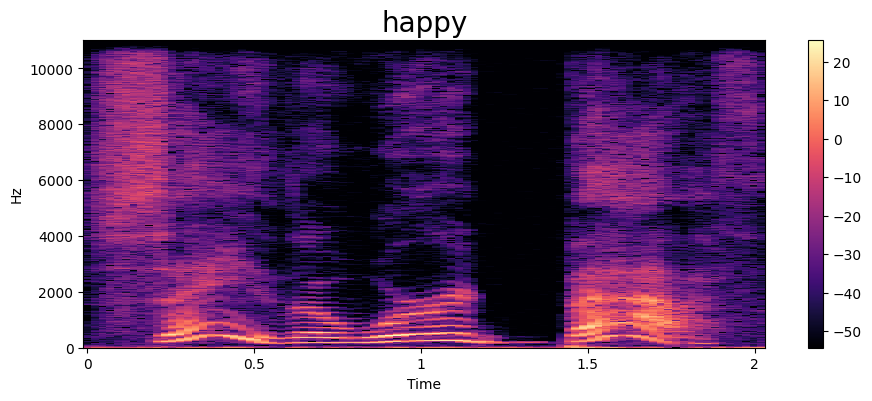

In [ ]:
# Picking a happy track
emotion = 'happy'
path = np.array(Tess_df.Path[Tess_df.Emotions==emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

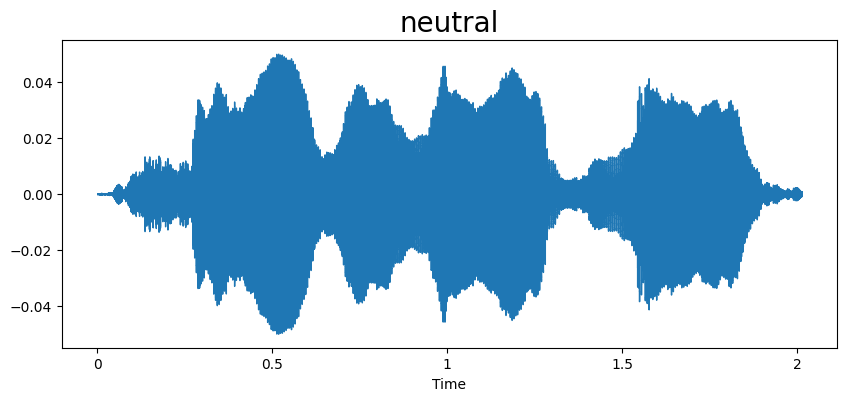

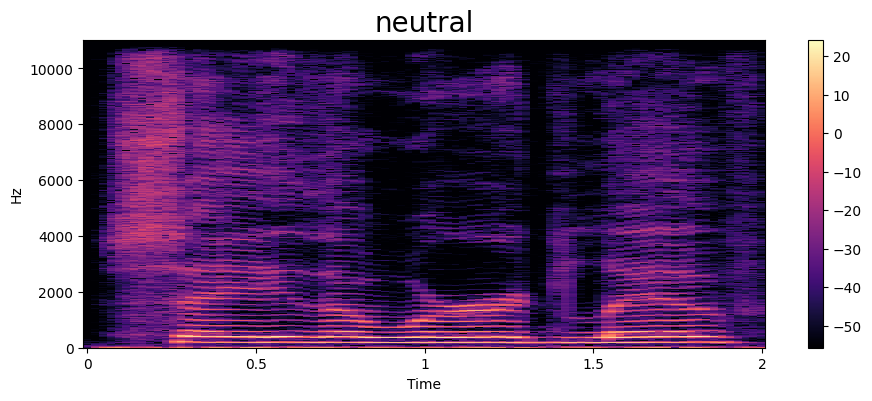

In [ ]:
# Picking a neutral track
emotion='neutral'
path = np.array(Tess_df.Path[Tess_df.Emotions==emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

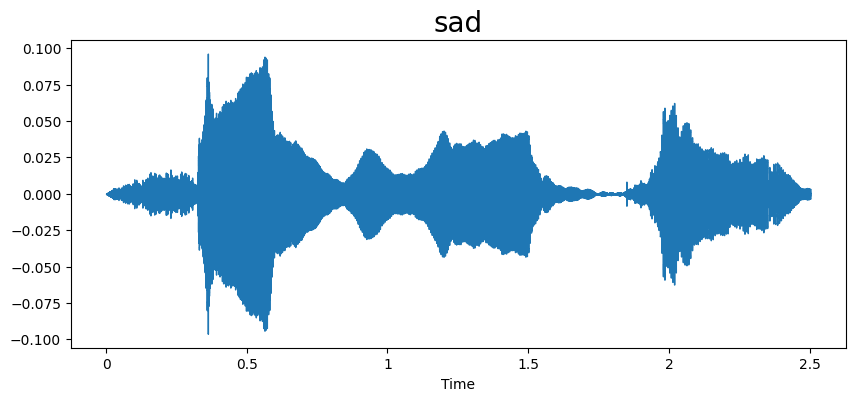

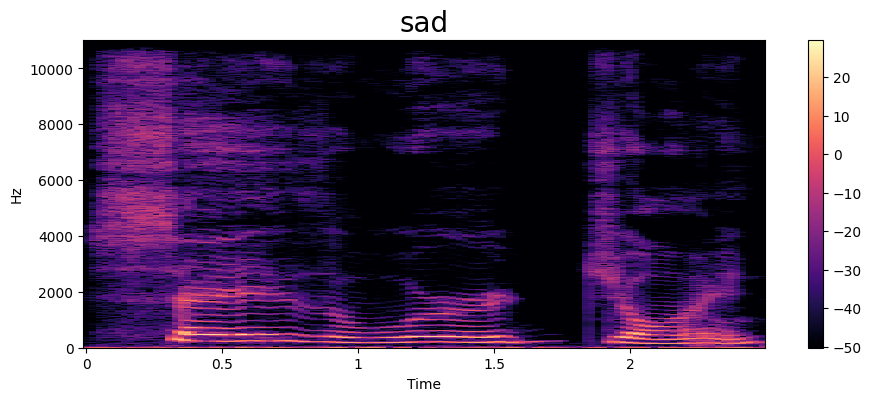

In [ ]:
# Picking a sad track
emotion='sad'
path = np.array(Tess_df.Path[Tess_df.Emotions==emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

#Feature Extraction

##a


In [ ]:
def AWGN(signal, num_bits=16, augmented_num=1, low=15, high=30):
    len_signal = len(signal)
    # Generate White Gaussian noise
    noise = np.random.normal(size=(augmented_num, len_signal)) # shape: [augmented_num, len_signal]
    # Normalize signal and noise
    constant = 2.0**(num_bits-1)
    norm_signal = signal / constant
    norm_noise = noise / constant
    # Compute signal and noise power
    signal_power = np.sum(np.square(norm_signal)) / len_signal
    noise_power = np.sum(np.square(norm_noise), axis=1) / len_signal
    # Random SNR: Uniform [15, 30] in dB
    target_snr = np.random.randint(low, high)
    # Compute cov:(covariance matrix) for each noise
    cov = np.sqrt((signal_power / noise_power) * 10 ** (- target_snr / 10))
    cov = np.ones((len_signal, augmented_num)) * cov
    # Generate noisy signal
    return signal + cov.T * noise

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
def extract_mfcc_with_noise(filename, num_bits=16, augmented_num=1, low=15, high=30):
    y, sr = librosa.load(filename, duration=3, offset=0.5)

    # Extract MFCC features
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)

    # Add Gaussian noise
    mfcc_with_noise = AWGN(mfcc, num_bits=num_bits, augmented_num=augmented_num, low=low, high=high)

    return mfcc_with_noise


In [ ]:
X_mfcc = Tess_df['path'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc_with_noise = Tess_df['path'].apply(lambda x: extract_mfcc_with_noise(x))

In [ ]:
X_mfcc

0       [-445.36737, 91.2761, -0.5894925, -17.314266, ...
1       [-456.2984, 95.33353, 17.71685, -33.765804, -1...
2       [-483.49344, 111.59739, 23.837387, -36.052895,...
3       [-412.7426, 85.44517, 7.658597, -21.482409, -0...
4       [-434.80698, 72.62281, 7.873911, -9.481151, 10...
                              ...                        
2795    [-381.48788, 54.64235, 5.5566583, -3.9225662, ...
2796    [-370.7609, 89.743805, -9.879371, 3.9782038, -...
2797    [-385.01498, 54.218525, -1.9096853, 23.492218,...
2798    [-358.9143, 66.78114, -3.7827804, -10.491969, ...
2799    [-363.832, 87.301476, 4.6160736, -1.3928401, -...
Name: path, Length: 2800, dtype: object

In [ ]:
X_mfcc_with_noise

0       [[-445.2399623501257, 89.6666333724876, 4.0528...
1       [[-452.44361789245795, 82.29788747303512, 31.2...
2       [[-485.7447410728217, 115.94492487374843, 22.3...
3       [[-408.97565005729, 82.00282389364259, 0.30498...
4       [[-446.100998059071, 83.7836764333613, 4.54647...
                              ...                        
2795    [[-373.12047186809025, 54.91698565556073, 15.8...
2796    [[-389.52564998746425, 81.9174728988549, -3.76...
2797    [[-381.41106911261073, 55.11984357592533, -0.9...
2798    [[-356.1790521497851, 63.6561425292118, -4.519...
2799    [[-361.22667422277317, 76.716904933794, 1.3310...
Name: path, Length: 2800, dtype: object

In [ ]:
X1 = [x for x in X_mfcc_with_noise]
X1 = np.array(X1)
X1.shape

(2800, 1, 40)

In [ ]:
X1 = X1.reshape((2800, 40))


In [ ]:
## input split
X1 = np.expand_dims(X1, -1)
X1.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y1 = enc.fit_transform(Tess_df[['label']])

In [ ]:
y1 = y1.toarray()

In [ ]:
y1.shape

(2800, 7)

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(Tess_df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(2800, 7)

##Feature extraction with noise

In [ ]:
def extract_mfcc_with_noise(filename, noise_level):
    y, sr = librosa.load(filename, duration=3, offset=0.5)

    # Extract MFCC features without noise
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)

    # Add Gaussian noise to the MFCC features
    noise = np.random.normal(0.5, noise_level, mfcc.shape)
    mfcc_with_noise = mfcc + noise

    return mfcc_with_noise

In [ ]:
# Example usage
extract_mfcc_with_noise(Tess_df['path'][0],0.01)

array([-4.44863444e+02,  9.17931860e+01, -8.83879774e-02, -1.68199422e+01,
        3.70275855e+00,  4.37778529e+00, -1.23481625e+01,  4.63157908e-01,
       -1.00056677e+01,  2.39940413e+00, -1.24997894e+01, -7.08124709e+00,
       -5.89943512e+00, -2.56708608e+00, -2.39207364e+00,  2.99526561e+00,
       -6.07001057e+00,  2.81119214e+00,  4.38785562e+00, -6.71552283e+00,
        6.63068351e+00,  1.90002048e+01,  1.57193601e+01,  3.00263010e+01,
        2.20635210e+01,  1.81092287e+01,  7.89689992e+00,  2.75968537e+00,
       -2.43564591e+00,  6.61699222e+00,  1.05814694e+00,  2.62636112e+00,
       -2.34905050e+00, -4.14321687e+00,  1.33621120e+00,  3.65853680e+00,
       -1.99055462e+00, -6.65899457e-01, -1.74905388e+00,  2.72706744e+00])

In [ ]:
X_mfcc_with_noise = Tess_df['path'].apply(lambda x: extract_mfcc_with_noise(x, noise_level=0.01))

In [ ]:
X_mfcc_with_noise

0       [-444.86808077281427, 91.78653961211981, -0.08...
1       [-455.7929852230763, 95.83275137395336, 18.207...
2       [-482.99078995672437, 112.09960982364153, 24.3...
3       [-412.25513815188407, 85.94354237937546, 8.159...
4       [-434.3032528431075, 73.1376056459331, 8.37032...
                              ...                        
2795    [-380.99741668566884, 55.15010350509054, 6.068...
2796    [-370.2572214316953, 90.24067395126059, -9.380...
2797    [-384.51206862349835, 54.70478914127563, -1.41...
2798    [-358.4195311848945, 67.29112654165195, -3.301...
2799    [-363.3355869297438, 87.8075316176286, 5.10281...
Name: path, Length: 2800, dtype: object

In [ ]:
X1 = [x for x in X_mfcc_with_noise]
X1 = np.array(X1)
X1.shape

(2800, 40)

In [ ]:
## input split
X1 = np.expand_dims(X1, -1)
X1.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y1 = enc.fit_transform(Tess_df[['label']])

In [ ]:
y1 = y1.toarray()

In [ ]:
y1.shape

(2800, 7)

##Feature extration without noise

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(Tess_df['path'][0])

array([-4.4536737e+02,  9.1276100e+01, -5.8949250e-01, -1.7314266e+01,
        3.2114549e+00,  3.8689065e+00, -1.2856502e+01, -3.4996916e-02,
       -1.0514206e+01,  1.8963066e+00, -1.3004946e+01, -7.5758562e+00,
       -6.3761377e+00, -3.0671549e+00, -2.8966866e+00,  2.5014243e+00,
       -6.5666771e+00,  2.3160999e+00,  3.9002411e+00, -7.2122092e+00,
        6.1384783e+00,  1.8507452e+01,  1.5220099e+01,  2.9525784e+01,
        2.1546635e+01,  1.7631252e+01,  7.3770423e+00,  2.2608619e+00,
       -2.9354761e+00,  6.0986028e+00,  5.5288827e-01,  2.1243880e+00,
       -2.8407273e+00, -4.6624751e+00,  8.0207360e-01,  3.1533177e+00,
       -2.4966433e+00, -1.1518217e+00, -2.2240906e+00,  2.2110424e+00],
      dtype=float32)

In [ ]:
X_mfcc = Tess_df['path'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-445.36737, 91.2761, -0.5894925, -17.314266, ...
1       [-456.2984, 95.33353, 17.71685, -33.765804, -1...
2       [-483.49344, 111.59739, 23.837387, -36.052895,...
3       [-412.7426, 85.44517, 7.658597, -21.482409, -0...
4       [-434.80698, 72.62281, 7.873911, -9.481151, 10...
                              ...                        
2795    [-381.48788, 54.64235, 5.5566583, -3.9225662, ...
2796    [-370.7609, 89.743805, -9.879371, 3.9782038, -...
2797    [-385.01498, 54.218525, -1.9096853, 23.492218,...
2798    [-358.9143, 66.78114, -3.7827804, -10.491969, ...
2799    [-363.832, 87.301476, 4.6160736, -1.3928401, -...
Name: path, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(Tess_df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(2800, 7)

# Split your dataset into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels for both clean and noisy data
X_train_all, X_temp, y_train_all, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)

# Further split the training set into training and validation sets
X_validation, X_test, y_validation, y_test =  train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Assuming X1 and y1 are your features and labels for noisy data
X_train_noisy, X_temp1, y_train_noisy, y_temp1 = train_test_split(X1, y1, test_size=1, random_state=42)

X_train = np.concatenate((X_train_all, X_train_noisy), axis=0)
y_train = np.concatenate((y_train_all, y_train_noisy), axis=0)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_validation shape:", X_validation.shape)
print("y_validation shape:", y_validation.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3919, 40, 1)
y_train shape: (3919, 7)
X_validation shape: (840, 40, 1)
y_validation shape: (840, 7)
X_test shape: (840, 40, 1)
y_test shape: (840, 7)


In [ ]:
# from sklearn.model_selection import train_test_split

# # Split your data into training (60%), validation (20%), and test (20%) sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
# X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# # Optionally, you can print the shapes of the resulting sets
# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)
# print("X_validation shape:", X_validation.shape)
# print("y_validation shape:", y_validation.shape)
# print("X_test shape:", X_test.shape)
# print("y_test shape:", y_test.shape)

#Hardcoded Model

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import Layer

In [ ]:
class LSTM(Layer):
    def __init__(self, units):
        super(LSTM, self).__init__()
        self.units = units

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.Wf = self.add_weight(name="Wf", shape=(input_dim, self.units * 4), initializer="uniform")
        self.Uf = self.add_weight(name="Uf", shape=(self.units, self.units * 4), initializer="uniform")
        self.bf = self.add_weight(name="bf", shape=(self.units * 4,), initializer="zeros")

        self.Wi = self.add_weight(name="Wi", shape=(input_dim, self.units * 4), initializer="uniform")
        self.Ui = self.add_weight(name="Ui", shape=(self.units, self.units * 4), initializer="uniform")
        self.bi = self.add_weight(name="bi", shape=(self.units * 4,), initializer="zeros")

        self.Wc = self.add_weight(name="Wc", shape=(input_dim, self.units * 4), initializer="uniform")
        self.Uc = self.add_weight(name="Uc", shape=(self.units, self.units * 4), initializer="uniform")
        self.bc = self.add_weight(name="bc", shape=(self.units * 4,), initializer="zeros")

        self.Wo = self.add_weight(name="Wo", shape=(input_dim, self.units * 4), initializer="uniform")
        self.Uo = self.add_weight(name="Uo", shape=(self.units, self.units * 4), initializer="uniform")
        self.bo = self.add_weight(name="bo", shape=(self.units * 4,), initializer="zeros")

    def call(self, inputs):
        h_t = tf.zeros((tf.shape(inputs)[0], self.units))  # Initialize h_t based on the batch size
        c_t = tf.zeros((tf.shape(inputs)[0], self.units))  # Initialize c_t based on the batch size
        outputs = []

        for x in tf.unstack(inputs, axis=1):
            z = x  # Only input should be used here

            # Implement the LSTM gates and cell state update here
            gate_inputs = tf.matmul(z, self.Wf) + tf.matmul(h_t, self.Uf) + self.bf
            f_t, i_t, c_tilde, o_t = tf.split(gate_inputs, 4, axis=-1)

            f_t = tf.sigmoid(f_t)
            i_t = tf.sigmoid(i_t)
            c_tilde = tf.tanh(c_tilde)
            o_t = tf.sigmoid(o_t)

            c_t = f_t * c_t + i_t * c_tilde
            h_t = o_t * tf.tanh(c_t)

            outputs.append(h_t)

        return tf.stack(outputs, axis=1)


In [ ]:
class Dense(Layer):
    def __init__(self, units, activation=None):
        super(Dense, self).__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(name="W", shape=(input_dim, self.units), initializer="uniform")
        self.b = self.add_weight(name="b", shape=(self.units,), initializer="zeros")

    def call(self, inputs):
        z = tf.matmul(inputs, self.W) + self.b

        if self.activation == 'relu':
            return tf.nn.relu(z)
        elif self.activation == 'softmax':
            return tf.nn.softmax(z)
        else:
            return z

In [ ]:
class GlobalAveragePooling1D(Layer):
    def __init__(self):
        super(GlobalAveragePooling1D, self).__init__()

    def call(self, inputs):
        return tf.reduce_mean(inputs, axis=1)

In [ ]:
class Dropout(Layer):
    def __init__(self, rate):
        super(Dropout, self).__init__()
        self.rate = rate

    def call(self, inputs, training=False):
        if training:
            if self.rate > 0:
                dropout_mask = tf.random.uniform(shape=tf.shape(inputs)) > self.rate
                return inputs * tf.cast(dropout_mask, tf.float32)
        return inputs

In [ ]:
model = Sequential()
model.add(LSTM(128))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling1D())
model.add(Dense(7, activation='softmax'))


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import Loss
from tensorflow.keras.optimizers import Optimizer
from tensorflow.keras.optimizers import Adam

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("best_model.h5", monitor="val_accuracy", save_best_only=True, mode="max", verbose=1)

In [ ]:
# class CustomCategoricalCrossentropy(Loss):
#     def call(self, y_true, y_pred):
#         y_true = tf.convert_to_tensor(y_true)
#         y_pred = tf.convert_to_tensor(y_pred)
#         y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
#         return -tf.reduce_sum(y_true * tf.math.log(y_pred), axis=-1)

In [ ]:
# from keras.losses import Loss
# from tensorflow.keras.losses import CategoricalCrossentropy
# class CustomCategoricalCrossentropy(Loss):
#     def call(self, y_true, y_pred):
#         return CategoricalCrossentropy()(y_true, y_pred)


In [ ]:
# model.compile(loss=CustomCategoricalCrossentropy(), optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test), callbacks=[checkpoint])

Epoch 1/200


61/62 [============================>.] - ETA: 0s - loss: 1.9459 - accuracy: 0.1583
Epoch 1: val_accuracy improved from -inf to 0.29881, saving model to best_model.h5
62/62 [==============================] - 17s 138ms/step - loss: 1.9459 - accuracy: 0.1590 - val_loss: 1.9457 - val_accuracy: 0.2988
Epoch 2/200
61/62 [============================>.] - ETA: 0s - loss: 1.9456 - accuracy: 0.2290
Epoch 2: val_accuracy did not improve from 0.29881
62/62 [==============================] - 5s 78ms/step - loss: 1.9456 - accuracy: 0.2289 - val_loss: 1.9450 - val_accuracy: 0.2655
Epoch 3/200
61/62 [============================>.] - ETA: 0s - loss: 1.9441 - accuracy: 0.2193
Epoch 3: val_accuracy did not improve from 0.29881
62/62 [==============================] - 5s 79ms/step - loss: 1.9440 - accuracy: 0.2194 - val_loss: 1.9379 - val_accuracy: 0.1952
Epoch 4/200
62/62 [==============================] - ETA: 0s - loss: 1.9025 - accuracy: 0.2072
Epoch 4: val_accuracy did not improve from 0.29881
62/6

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 40, 128)           266240    
                                                                 
 dense_3 (Dense)             (None, 40, 64)            8256      
                                                                 
 dropout_2 (Dropout)         (None, 40, 64)            0         
                                                                 
 dense_4 (Dense)             (None, 40, 32)            2080      
                                                                 
 dropout_3 (Dropout)         (None, 40, 32)            0         
                                                                 
 global_average_pooling1d_1  (None, 32)                0         
  (GlobalAveragePooling1D)                                       
                                                      

In [ ]:
# Retrieve the best validation accuracy and the epoch at which it occurred
best_val_accuracy = max(history.history['val_accuracy'])
best_val_accuracy_epoch = history.history['val_accuracy'].index(best_val_accuracy)

print("Best Validation Accuracy:", best_val_accuracy)
print("Epoch with Best Validation Accuracy:", best_val_accuracy_epoch + 1)  # Adding 1 because epoch indexing starts from 1

Best Validation Accuracy: 0.9535714387893677
Epoch with Best Validation Accuracy: 184


#Plot the results

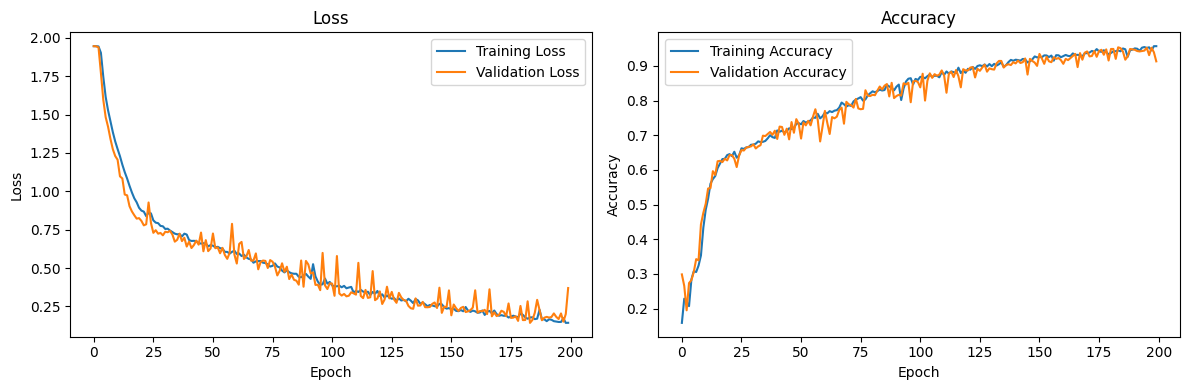

In [ ]:
# Get training and validation loss and accuracy from the history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot loss
ax1.set_title('Loss')
ax1.plot(training_loss, label='Training Loss')
ax1.plot(validation_loss, label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot accuracy
ax2.set_title('Accuracy')
ax2.plot(training_accuracy, label='Training Accuracy')
ax2.plot(validation_accuracy, label='Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Show the plots
plt.tight_layout()
plt.show()